<a href="https://colab.research.google.com/github/hvyrain/imis/blob/main/%EC%8A%A4%ED%94%84%EB%A0%88%EB%93%9C%EC%8B%9C%ED%8A%B8%EC%8B%A4%EB%AC%B4_%EC%97%91%EC%85%80%ED%8C%8C%EC%9D%BC%EC%97%AC%EB%9F%AC%EC%8B%9C%ED%8A%B8%EC%9D%BD%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 엑셀 여러 시트 통합하기
- 엑셀에 있는 같은 데이터 구조를 가진 시트들을 읽어 하나의 CSV 파일로 저장한다.
- 예제 파일인 "part_02\06\데이터모으기(준비).xlsx"를 미리 업로드해야 한다.
- Thonny에서 실행할 때는 pandas, openpyxl 모듈이 설치되어 있어야 한다.

## 시트 이름을 알고 있을 때

In [ ]:
# thonny를 사용할 경우 pandas 모듈 설치 및 아래 명령어로 쉘에서 모듈 설치해야 함.
# pip3 install openpyxl
import pandas as pd

sheet_name = ['광주', '밀양', '마산', '부산', '서산', '창원', '아산']
df = pd.read_excel('데이터모으기(준비).xlsx', sheet_name=sheet_name[0])
df['사업장'] = sheet_name[0]

for i in sheet_name[1:] :
    tempdf = pd.read_excel('데이터모으기(준비).xlsx', sheet_name=i)
    tempdf['사업장'] = i
    df = pd.concat([df, tempdf], ignore_index=True)

df.to_csv('concaternated.csv', encoding='euc-kr')

In [ ]:
df.head()

,사업부,품목명,거래처코드,차종코드,대표작업품목(ASS'Y),등록일자,등록자,사업장
0,DTS,기타,11202,GB 중공 DRIVE SHAFT,NaN,2017-12-08 09:05:23.003,박민영,광주
1,DTS,기타,11202,GB,NaN,2017-12-08 09:06:38.290,박민영,광주
2,DTS,기타,21015,소형전술차량,NaN,2019-09-15 17:04:23.780,한재호,광주
3,DTS,기타,21015,소형전술차량,NaN,2019-09-15 17:06:51.473,한재호,광주
4,DTS,ADH 본형,21101,PINDAD 6X6 PENSER,NaN,2016-11-14 14:03:29.533,김동호,광주


## 전체 시트 가져오기

In [ ]:
# thonny를 사용할 경우 아래 명령어로 쉘에서 모듈 설치해야 함.
# pip3 install openpyxl
import pandas as pd

sheets = pd.read_excel('데이터모으기(준비).xlsx', sheet_name=None)
count = 0
df = pd.DataFrame()

for k,v in sheets.items() :
    if count == 0 : # 첫 번째 시트를 건너뛴다.
        count += 1
        continue
    v['사업장'] = k
    df = pd.concat([df, v], ignore_index=True)

df.to_csv('concat_all.csv', encoding='euc-kr')

In [ ]:
df.head()

,사업부,품목명,거래처코드,차종코드,대표작업품목(ASS'Y),등록일자,등록자,사업장
0,DTS,기타,11202,GB 중공 DRIVE SHAFT,NaN,2017-12-08 09:05:23.003,박민영,광주
1,DTS,기타,11202,GB,NaN,2017-12-08 09:06:38.290,박민영,광주
2,DTS,기타,21015,소형전술차량,NaN,2019-09-15 17:04:23.780,한재호,광주
3,DTS,기타,21015,소형전술차량,NaN,2019-09-15 17:06:51.473,한재호,광주
4,DTS,ADH 본형,21101,PINDAD 6X6 PENSER,NaN,2016-11-14 14:03:29.533,김동호,광주


# 여러 개 파일 읽기

In [ ]:
# 읽어야 할 파일을 미리 업로드해 둔다.
# 예 : 광주.xlsx, 마산.xlsx, 밀양.xlsx
import pandas as pd
df_file = pd.DataFrame()

filelist = ['광주','마산','밀양']

for i in filelist :
  file = pd.read_excel(i+'.xlsx', sheet_name=0)
  file['사업장'] = i
  df_file = pd.concat([df_file, file], ignore_index=True)

df_file.to_csv('concat_files.csv', encoding='euc-kr')

In [ ]:
df_file

,사업부,품목명,거래처코드,차종코드,대표작업품목(ASS'Y),등록일자,등록자,사업장
0,DTS,기타,11202,GB 중공 DRIVE SHAFT,NaN,2017-12-08 09:05:23.003,박민영,광주
1,DTS,기타,11202,GB,NaN,2017-12-08 09:06:38.290,박민영,광주
2,DTS,기타,21015,소형전술차량,NaN,2019-09-15 17:04:23.780,한재호,광주
3,DTS,기타,21015,소형전술차량,NaN,2019-09-15 17:06:51.473,한재호,광주
4,DTS,ADH 본형,21101,PINDAD 6X6 PENSER,NaN,2016-11-14 14:03:29.533,김동호,광주
...,...,...,...,...,...,...,...,...
118,MOTEK,PRESS 본형,81007,KH RLCA AIR SUS (RH),NaN,2016-02-15 11:56:07.483,김기범,밀양
119,MOTEK,PRESS 본형,81007,KH RLCA CONV (LH),NaN,2016-02-15 11:56:48.447,김기범,밀양
120,MOTEK,본형,86020,KH(NA),NaN,2017-10-07 18:09:19.960,정수란,밀양
121,MOTEK,PRESS 본형,91003,TG FLCA (LH),NaN,2016-02-15 11:58:02.850,김기범,밀양


# 간단한 분석
- info(), unique(), query(), crosstab(), groupby(), ...

In [ ]:
df = pd.read_csv('concat_all.csv', encoding='euc-kr')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     760 non-null    int64 
 1   사업부            760 non-null    object
 2   품목명            760 non-null    object
 3   거래처코드          760 non-null    int64 
 4   차종코드           710 non-null    object
 5   대표작업품목(ASS'Y)  52 non-null     object
 6   등록일자           760 non-null    object
 7   등록자            759 non-null    object
 8   사업장            760 non-null    object
dtypes: int64(2), object(7)
memory usage: 53.6+ KB


In [ ]:
# 열의 유일한 값을 가져와본다.
df.iloc[:,0].unique(), df.iloc[:,7].unique(), df['등록자'].unique()

(array(['DTS', 'MOTEK', 'CTR', 'CMS'], dtype=object),
 array(['광주', '밀양', '마산', '부산', '서산', '창원', '아산'], dtype=object),
 array(['박민영', '한재호', '김동호', '정수란', '한이경', '박병철', '김기범', '김대성', '홍성민',
        '마동석', '조예준', '이진우', '고원지', '장진형', '조하나', nan, '김원석'], dtype=object))

In [ ]:
# 사업부가 CTR이고 사업장이 아산인 등록자는?
df.query('사업부=="CTR" and 사업장=="아산"')['등록일자']#.unique()

727   2019-12-03 11:13:25.050
728   2018-06-17 17:04:36.727
729   2018-06-17 17:06:50.550
730   2018-06-17 17:07:49.070
731   2018-08-25 10:18:57.447
741   2018-11-02 19:10:09.543
742   2018-11-02 19:11:36.400
743   2019-12-03 11:12:29.680
744   2020-01-19 16:42:35.963
745   2020-01-19 16:44:56.593
746   2020-01-19 16:47:11.773
Name: 등록일자, dtype: datetime64[ns]

In [ ]:
# 갯수를 세어본다.
pd.crosstab(index=df.사업부, columns=df.사업장, margins=True)

사업장,광주,마산,밀양,부산,서산,아산,창원,All
사업부,,,,,,,,
CMS,0,0,0,17,0,0,0,17
CTR,0,41,0,0,0,11,579,631
DTS,64,0,0,0,0,0,0,64
MOTEK,0,0,18,0,4,26,0,48
All,64,41,18,17,4,37,579,760


In [ ]:
# 등록자별 갯수를 세어본다.
df.groupby('등록자').count()

,사업부,품목명,거래처코드,차종코드,대표작업품목(ASS'Y),등록일자,사업장
등록자,,,,,,,
고원지,16,16,16,15,2,16,16
김기범,58,58,58,56,4,58,58
김대성,95,95,95,93,6,95,95
김동호,22,22,22,22,0,22,22
김원석,2,2,2,2,0,2,2
마동석,14,14,14,14,9,14,14
박민영,3,3,3,3,0,3,3
박병철,16,16,16,16,3,16,16
이진우,9,9,9,9,2,9,9


In [ ]:
!sudo apt-get install -y fonts-nanum*
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 글꼴 목록 보기 : fc-list | grep -i nanum

In [ ]:
# 한글 글꼴 지정
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic', size=12)
plt.rcParams['axes.unicode_minus'] = False

<Axes: xlabel='사업장'>

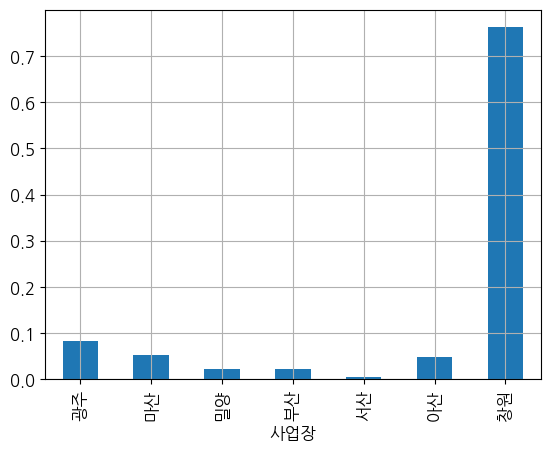

In [ ]:
import pandas as pd
pd.crosstab(index=df.사업부, columns=df.사업장, margins=True, normalize=True).iloc[-1,:-1].plot(kind='bar', grid=True)

<Axes: ylabel='All'>

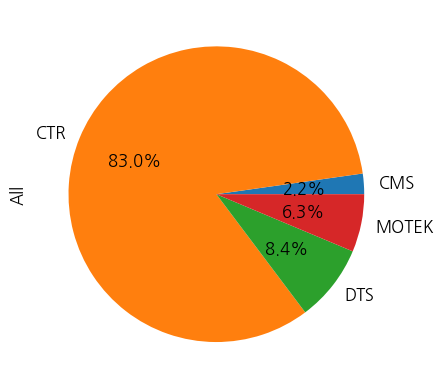

In [ ]:
import pandas as pd
pd.crosstab(index=df.사업부, columns=df.사업장, margins=True)['All'][:-1].plot(kind='pie', autopct='%.1f%%')

<Axes: xlabel='등록자', ylabel='사업부'>

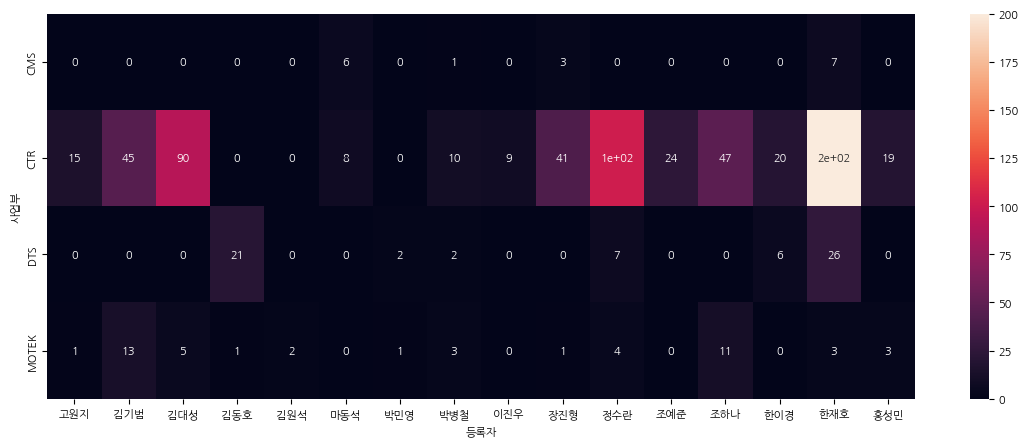

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,5))
plt.rc('font', size=8)
sns.heatmap(pd.crosstab(index=df.사업부, columns=df.등록자), annot=True)